In [2]:
'''importing the required libraries'''

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import random
import os

'''Data Preprocessing including Data Augumentation and Train Test split '''

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('training_set',target_size = (64, 64),batch_size = 20,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('test_set',target_size = (64, 64),batch_size = 20,class_mode = 'categorical')

'''Stepwise procedure of creating CNN model'''

# Initialising the CNN
model = Sequential()

# Adding the Convolution layer
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Adding the Pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second Convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))

# Adding a second Pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding the Flattening layer
model.add(Flatten())

# Adding the Full connection(hidden) layers
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 2, activation = 'sigmoid'))

# Compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fitting the CNN to the images
model.fit_generator(training_set,steps_per_epoch = 110,epochs = 5,validation_data = test_set,validation_steps = 10)


C:\Users\DAMI\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Found 999 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Epoch 1/5
110/110 [==============================] - 53s 485ms/step - loss: 0.6906 - acc: 0.5432 - val_loss: 0.6765 - val_acc: 0.5533
Epoch 2/5
110/110 [==============================] - 26s 237ms/step - loss: 0.6636 - acc: 0.5998 - val_loss: 0.6819 - val_acc: 0.5650
Epoch 3/5
110/110 [==============================] - 27s 247ms/step - loss: 0.5960 - acc: 0.6834 - val_loss: 0.6428 - val_acc: 0.6650
Epoch 4/5
110/110 [==============================] - 27s 246ms/step - loss: 0.5648 - acc: 0.7090 - val_loss: 0.7268 - val_acc: 0.5917
Epoch 5/5
110/110 [==============================] - 27s 244ms/step - loss: 0.5192 - acc: 0.7429 - val_loss: 0.6636 - val_acc: 0.6500


In [3]:
''' Evaluation of the model'''

scores = model.evaluate_generator(generator = test_set)
print(scores[1])

'''Prediction of the model'''

test_set.reset()
pred=model.predict_generator(test_set,verbose=1)
pred_class=np.argmax(pred,axis=1)
print(pred_class)

0.649999996026357
15/15 [==============================] - 2s 124ms/step
[1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0
 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1
 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0
 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0
 1 1 1 1]


In [53]:
''' Convert the labels back to dogs and cats from 0 and 1 '''

labels = (training_set.class_indices)
print(labels)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in pred_class]

{'cats': 0, 'dogs': 1}


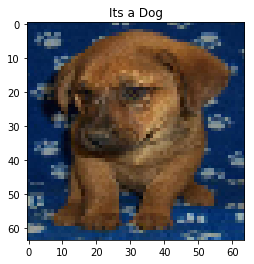

In [66]:
''' Testing the model on a new image '''

test_image1 = image.load_img('dog_cat.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict_classes(test_image)
if result == 0:
    name="Its a Cat"
else:
    name="Its a Dog"
    
plt.imshow(test_image1)
plt.title(name)
plt.show()